# Загрузка Pandas и очистка данных

In [404]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import math
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [218]:
df = pd.read_csv('main_task.csv')

# Определение функций

In [3]:


def get_price_range(city):
    range_sum = df[df.city == city].price_range.value_counts().sum()
    range_1 = df[(df.city == city) &
                 (df.price_range == '$')].price_range.value_counts()[0]
    range_2 = df[(df.city == city) &
                 (df.price_range == '$$ - $$$')].price_range.value_counts()[0]
    range_3 = df[(df.city == city) &
                 (df.price_range == '$$$$')].price_range.value_counts()[0]
    zero_data = df[df.city == city].price_range.isna().sum()
    lim_1 = int(round(zero_data*range_1/range_sum))
    lim_2 = int(round(zero_data*range_2/range_sum))
    lim_3 = int(round(zero_data*range_3/range_sum))
    mask = df.city == city
    df.loc[mask, 'price_range'] = df.loc[mask, 'price_range'].fillna('$', limit=lim_1)
    df.loc[mask, 'price_range'] = df.loc[mask, 'price_range'].fillna('$$ - $$$', limit=lim_2)
    df.loc[mask, 'price_range'] = df.loc[mask, 'price_range'].fillna('$$$$', limit=lim_3)
    df.loc[mask, 'price_range'] = df.loc[mask, 'price_range'].fillna('$$ - $$$')

def get_cuisin(city):
    dfc = df[df.city == city]
    cuis = []
    cuisines_city_all = []
    for data in dfc.cuisines.dropna():
        for cuisines in data[1:-1].split(', '):
            cuisines_city_all.append(cuisines[1:-1])
    cuisines_city = set()
    for cuisin in cuisines_city_all:
        cuisines_city.add(cuisin)
    cuisines_city_num = {}
    for item in cuisines_city:
        cuisines_city_num[item] = 0
    for cuisin in cuisines_city_all:
        cuisines_city_num[cuisin] += 1
    df_c_c_num = pd.DataFrame.from_dict(cuisines_city_num,
                                        orient='index', columns=['num'])
    for i in range(2):
        temp = df_c_c_num.num.sort_values(ascending=False).index[i]
        cuis.append(temp)
    return cuis

def get_country(city):
    for key, value in country.items():
        if key == city:
            return value
    return 'other'

def categorical_check(col):
    '''Unique data counter output and basic statistics
    '''
    display(pd.DataFrame(df[col].value_counts()))
    display(df[col].describe())


def numerical_check(col):
    '''Histogram output and basic statistics
    '''
    display(df[col].hist())
    display(df[col].describe())

# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [5]:
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [785]:
nan_df = pd.DataFrame(df.isna().sum(), columns=['NaN'])
nan_df

,NaN
rest_id,0
city,0
cuisines,9283
ranking,0
rating,0
price_range,2
number_reviews,0
reviews,0
url_ta,0
id_ta,0


In [220]:
df.rename(columns = {'Restaurant_id': 'rest_id', 'City': 'city',
                     'Cuisine Style': 'cuisines', 'Ranking' : 'ranking',
                     'Rating' : 'rating', 'Price Range': 'price_range',
                     'Number of Reviews': 'number_reviews', 'Reviews': 'reviews',
                     'URL_TA': 'url_ta', 'ID_TA': 'id_ta'}, inplace=True)

In [450]:
country = {'London': 'United Kingdom', 
           'Edinburgh': 'United Kingdom', 
           'Paris': 'France', 
           'Lyon': 'France',
           'Madrid': 'Spain',
           'Barcelona': 'Spain', 
           'Hamburg': 'Germany',
           'Berlin': 'Germany', 
           'Munich': 'Germany',
           'Milan': 'Italy',
           'Rome': 'Italy',
           'Prague': 'Czech',  
           'Lisbon':'Portugal', 
           'Oporto': 'Portugal',
           'Vienna': 'Austria', 
           'Amsterdam': 'Netherlands', 
           'Brussels': 'Belgium', 
           'Stockholm': 'Sweden', 
           'Budapest': 'Hungary',  
           'Warsaw': 'Poland',
           'Krakow': 'Poland',  
           'Dublin': 'Ireland', 
           'Copenhagen': 'Denmark', 
           'Athens': 'Greece', 
           'Zurich': 'Switzerland',
           'Geneva': 'Switzerland',  
           'Oslo': 'Norway', 
           'Helsinki': 'Finland', 
           'Bratislava': 'Slovakia', 
           'Luxembourg': 'Luxembourg', 
           'Ljubljana':'Slovenia'}
country

{'London': 'United Kingdom',
 'Edinburgh': 'United Kingdom',
 'Paris': 'France',
 'Lyon': 'France',
 'Madrid': 'Spain',
 'Barcelona': 'Spain',
 'Hamburg': 'Germany',
 'Berlin': 'Germany',
 'Munich': 'Germany',
 'Milan': 'Italy',
 'Rome': 'Italy',
 'Prague': 'Czech',
 'Lisbon': 'Portugal',
 'Oporto': 'Portugal',
 'Vienna': 'Austria',
 'Amsterdam': 'Netherlands',
 'Brussels': 'Belgium',
 'Stockholm': 'Sweden',
 'Budapest': 'Hungary',
 'Warsaw': 'Poland',
 'Krakow': 'Poland',
 'Dublin': 'Ireland',
 'Copenhagen': 'Denmark',
 'Athens': 'Greece',
 'Zurich': 'Switzerland',
 'Geneva': 'Switzerland',
 'Oslo': 'Norway',
 'Helsinki': 'Finland',
 'Bratislava': 'Slovakia',
 'Luxembourg': 'Luxembourg',
 'Ljubljana': 'Slovenia'}

## city

In [17]:
categorical_check('city')

,city
London,5757
Paris,4897
Madrid,3108
Barcelona,2734
Berlin,2155
Milan,2133
Rome,2078
Prague,1443
Lisbon,1300
Vienna,1166


count      40000
unique        31
top       London
freq        5757
Name: city, dtype: object

In [479]:
def get_country(city):
    for key, value in country.items():
        if key == city:
            return value
    return 'other'

In [482]:
df['country'] = df.city.apply(get_country)

In [483]:
df

,rest_id,city,cuisines,ranking,rating,price_range,number_reviews,reviews,url_ta,id_ta,reviews_1,dates_1,review_1,review_1_count,review_2,date_1,dates_1_count,date_2,review_1_1,date_1_1,date_1_d,date_2_d,delta,delta_day,country
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,"[['Good food at your doorstep', 'A good hotel ...","'12/31/2017', '11/20/2017']]",Good food at your doorstep',2.0,A good hotel restaurant,12/31/2017',2.0,11/20/2017,Good food at your doorstep,12/31/2017,2017-12-31,2017-11-20,41 days,41.0,France
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,"[['Unique cuisine', 'Delicious Nepalese food'],","'07/06/2017', '06/19/2016']]",Unique cuisine',2.0,Delicious Nepalese food,07/06/2017',2.0,06/19/2016,Unique cuisine,07/06/2017,NaT,NaT,NaT,NaN,Sweden
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,"[['Catch up with friends', 'Not exceptional'],","'01/08/2018', '01/06/2018']]",Catch up with friends',2.0,Not exceptional,01/08/2018',2.0,01/06/2018,Catch up with friends,01/08/2018,2018-01-08,2018-01-06,2 days,2.0,United Kingdom
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,Germany
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,"[['Best place to try a Bavarian food', 'Nice b...","'11/18/2017', '02/19/2017']]",Best place to try a Bavarian food',2.0,Nice building but improvements need to be...,11/18/2017',2.0,02/19/2017,Best place to try a Bavarian food,11/18/2017,2017-11-18,2017-02-19,272 days,272.0,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,"[['The real Italian experience!', 'Wonderful f...","'12/16/2017', '11/12/2017']]",The real Italian experience!',2.0,"Wonderful food, wonderful experience",12/16/2017',2.0,11/12/2017,The real Italian experience!,12/16/2017,2017-12-16,2017-11-12,34 days,34.0,Italy
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,"[['Parisian atmosphere', 'Bit pricey but inter...","'12/21/2017', '12/12/2017']]",Parisian atmosphere',2.0,Bit pricey but interesting decor and good...,12/21/2017',2.0,12/12/2017,Parisian atmosphere,12/21/2017,2017-12-21,2017-12-12,9 days,9.0,France
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,"[['Good by swedish standards', 'A hidden jewel...","'11/03/2016', '04/12/2008']]",Good by swedish standards',2.0,A hidden jewel in the middle of Västertorp...,11/03/2016',2.0,04/12/2008,Good by swedish standards,11/03/2016,NaT,NaT,NaT,NaN,Sweden
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,"[['Underground restaurant', 'Oldest Restaurant...","'07/11/2017', '06/18/2017']]",Underground restaurant',2.0,Oldest Restaurant in Warsaw,07/11/2017',2.0,06/18/2017,Underground restaurant,07/11/2017,2017-07-11,2017-06-

## cuisines

In [94]:
cuisines_all = []
for data in df.cuisines.dropna():
    for cuisines in data[1:-1].split(', '):
        cuisines_all.append(cuisines[1:-1])

cuisines = set()
for cuisin in cuisines_all:
    cuisines.add(cuisin)
len(cuisines)

125

In [102]:
cuisines_num = {}
for item in cuisines:
    cuisines_num[item] = 0
for cuisin in cuisines_all:
    cuisines_num[cuisin] += 1

In [103]:
cuisines_num

{'Balti': 83,
 'European': 10060,
 'Pakistani': 123,
 'Polish': 365,
 'Cajun & Creole': 20,
 'Belgian': 270,
 'Tibetan': 24,
 'Taiwanese': 22,
 'Ukrainian': 18,
 'American': 1315,
 'Bangladeshi': 76,
 'Caribbean': 93,
 'Native American': 4,
 'Scandinavian': 342,
 'Barbecue': 555,
 'Fast Food': 1705,
 'Eastern European': 496,
 'Sri Lankan': 25,
 'Russian': 58,
 'New Zealand': 6,
 'Georgian': 17,
 'German': 662,
 'Vietnamese': 513,
 'Korean': 167,
 'Cafe': 2325,
 'Sushi': 1156,
 'Chinese': 1145,
 'Malaysian': 31,
 'Wine Bar': 697,
 'Portuguese': 1107,
 'Pizza': 2849,
 'Dutch': 294,
 'Soups': 494,
 'Delicatessen': 392,
 'Indian': 1041,
 'Central European': 1393,
 'Singaporean': 19,
 'Fusion': 577,
 'Salvadoran': 1,
 'Chilean': 8,
 'Argentinean': 169,
 'Healthy': 620,
 'French': 3190,
 'Colombian': 20,
 'Street Food': 263,
 'Brew Pub': 225,
 'British': 1595,
 'Moroccan': 141,
 'Cuban': 23,
 'Turkish': 444,
 'Brazilian': 127,
 'Nepali': 83,
 'Vegetarian Friendly': 11189,
 'Irish': 284,
 'Ha

In [499]:
df_cuisines_num = pd.DataFrame.from_dict(cuisines_num, orient='index', columns=['num'])
#df_cuisines_num.num.sort_values(ascending=False)
#df_cuisines_num['cuisin'] = df_cuisines_num.index
#df_cuisines_num.reset_index()
df_cuisines_num

,num
Balti,83
European,10060
Pakistani,123
Polish,365
Cajun & Creole,20
...,...
Norwegian,75
Croatian,27
Peruvian,94
Thai,743


In [498]:
df_cuisines_num[df_cuisines_num.num == df_cuisines_num.num.max()].index[0]

'Vegetarian Friendly'

In [521]:
df['cuisin_count'] = df['cuisines'].str.split(', ').str.len()

In [129]:
df.cuisin_count.fillna(1).mean()

2.6224

In [522]:
df.cuisin_count.dropna().mean()

3.1127063189764623

In [582]:
def get_cuisin(city):
    dfc = df[df.city == city]
    cuis = []
    cuisines_city_all = []
    for data in dfc.cuisines.dropna():
        for cuisines in data[1:-1].split(', '):
            cuisines_city_all.append(cuisines[1:-1])
    cuisines_city = set()
    for cuisin in cuisines_city_all:
        cuisines_city.add(cuisin)
    cuisines_city_num = {}
    for item in cuisines_city:
        cuisines_city_num[item] = 0
    for cuisin in cuisines_city_all:
        cuisines_city_num[cuisin] += 1
    df_c_c_num = pd.DataFrame.from_dict(cuisines_city_num,
                                        orient='index', columns=['num'])
    for i in range(2):
        temp = df_c_c_num.num.sort_values(ascending=False).index[i]
        cuis.append(temp)
    return cuis

In [579]:
dfc = df[df.city == 'London']
cuis = []
cuisines_city_all = []
for data in dfc.cuisines.dropna():
    for cuisines in data[1:-1].split(', '):
        cuisines_city_all.append(cuisines[1:-1])
    
cuisines_city = set()
for cuisin in cuisines_city_all:
    cuisines_city.add(cuisin)
    
cuisines_city_num = {}
for item in cuisines_city:
    cuisines_city_num[item] = 0
for cuisin in cuisines_city_all:
    cuisines_city_num[cuisin] += 1
        
df_c_c_num = pd.DataFrame.from_dict(cuisines_city_num,
                                        orient='index', columns=['num'])
for i in range(3):
    temp = df_c_c_num.num.sort_values(ascending=False).index[i]
    cuis.append(temp)
    
cuis

['Vegetarian Friendly', 'British', 'Gluten Free Options']

In [594]:
get_cuisin('London')

['Vegetarian Friendly', 'British']

In [610]:
df['cuisines_2'].fillna('zero', inplace=True)
df['cuisines_2'] = df.apply(lambda x: get_cuisin(x['city']) if x['cuisines_2'] == 'zero' else x['cuisines'], axis=1)

In [602]:
df.cuisines[1]

nan

In [611]:
df

,rest_id,city,cuisines,ranking,rating,price_range,number_reviews,reviews,url_ta,id_ta,reviews_1,dates_1,review_1,review_1_count,review_2,date_1,dates_1_count,date_2,review_1_1,date_1_1,date_1_d,date_2_d,delta,delta_day,country,cuisin_count,cuisines_2
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,"[['Good food at your doorstep', 'A good hotel ...","'12/31/2017', '11/20/2017']]",Good food at your doorstep',2.0,A good hotel restaurant,12/31/2017',2.0,11/20/2017,Good food at your doorstep,12/31/2017,2017-12-31,2017-11-20,41 days,41.0,France,3.0,"['European', 'French', 'International']"
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,"[['Unique cuisine', 'Delicious Nepalese food'],","'07/06/2017', '06/19/2016']]",Unique cuisine',2.0,Delicious Nepalese food,07/06/2017',2.0,06/19/2016,Unique cuisine,07/06/2017,NaT,NaT,NaT,NaN,Sweden,NaN,"[European, Vegetarian Friendly]"
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,"[['Catch up with friends', 'Not exceptional'],","'01/08/2018', '01/06/2018']]",Catch up with friends',2.0,Not exceptional,01/08/2018',2.0,01/06/2018,Catch up with friends,01/08/2018,2018-01-08,2018-01-06,2 days,2.0,United Kingdom,7.0,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget..."
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,Germany,NaN,"[Vegetarian Friendly, European]"
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,"[['Best place to try a Bavarian food', 'Nice b...","'11/18/2017', '02/19/2017']]",Best place to try a Bavarian food',2.0,Nice building but improvements need to be...,11/18/2017',2.0,02/19/2017,Best place to try a Bavarian food,11/18/2017,2017-11-18,2017-02-19,272 days,272.0,Germany,3.0,"['German', 'Central European', 'Vegetarian Fri..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,"[['The real Italian experience!', 'Wonderful f...","'12/16/2017', '11/12/2017']]",The real Italian experience!',2.0,"Wonderful food, wonderful experience",12/16/2017',2.0,11/12/2017,The real Italian experience!,12/16/2017,2017-12-16,2017-11-12,34 days,34.0,Italy,4.0,"['Italian', 'Vegetarian Friendly', 'Vegan Opti..."
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,"[['Parisian atmosphere', 'Bit pricey but inter...","'12/21/2017', '12/12/2017']]",Parisian atmosphere',2.0,Bit pricey but interesting decor and good...,12/21/2017',2.0,12/12/2017,Parisian atmosphere,12/21/2017,2017-12-21,2017-12-12,9 days,9.0,France,5.0,"['French', 'American', 'Bar', 'European', 'Veg..."
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,"[['Good by swedish standards', 'A hidden jewel...","'11/03/2016', '04/12/2008']]",Good by swedish standards',2.0,A hidden jewel in the middle of Västertorp...,11/03/2016',2.0,04/12/2008,Good by swedish standards,11/03/2016,NaT,NaT,NaT,NaN,Sweden,2.0,"['Japanese', 'Sushi']"
39998,id_640,Warsaw,

## ranking

count    40000.000000
mean      3676.028525
std       3708.749567
min          1.000000
25%        973.000000
50%       2285.000000
75%       5260.000000
max      16444.000000
Name: ranking, dtype: float64

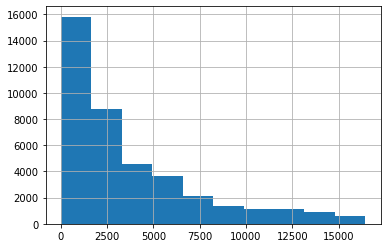

In [18]:
numerical_check('ranking')

count    40000.000000
mean         3.993037
std          0.668417
min          1.000000
25%          3.500000
50%          4.000000
75%          4.500000
max          5.000000
Name: rating, dtype: float64

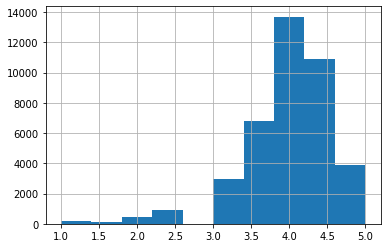

In [19]:
numerical_check('rating')

count    37457.000000
mean       124.825480
std        295.666352
min          2.000000
25%          9.000000
50%         33.000000
75%        115.000000
max       9660.000000
Name: number_reviews, dtype: float64

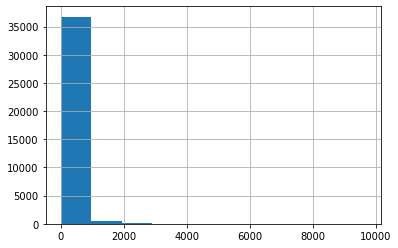

In [20]:
numerical_check('number_reviews')

In [762]:
nan_df = pd.DataFrame(df.isna().sum(), columns=['NaN'])
nan_df

,NaN
rest_id,0
city,0
cuisines,9283
ranking,0
rating,0
price_range,2
number_reviews,2543
reviews,0
url_ta,0
id_ta,0


## rating

## price_range

In [14]:
categorical_check('price_range')

,price_range
$$ - $$$,18412
$,6279
$$$$,1423


count        26114
unique           3
top       $$ - $$$
freq         18412
Name: price_range, dtype: object

In [613]:
df.price_range.value_counts()

$$ - $$$    18412
$            6279
$$$$         1423
Name: price_range, dtype: int64

In [626]:
df

,rest_id,city,cuisines,ranking,rating,price_range,number_reviews,reviews,url_ta,id_ta,reviews_1,dates_1,review_1,review_1_count,review_2,date_1,dates_1_count,date_2,review_1_1,date_1_1,date_1_d,date_2_d,delta,delta_day,country,cuisin_count,cuisines_2
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,"[['Good food at your doorstep', 'A good hotel ...","'12/31/2017', '11/20/2017']]",Good food at your doorstep',2.0,A good hotel restaurant,12/31/2017',2.0,11/20/2017,Good food at your doorstep,12/31/2017,2017-12-31,2017-11-20,41 days,41.0,France,3.0,"['European', 'French', 'International']"
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,"[['Unique cuisine', 'Delicious Nepalese food'],","'07/06/2017', '06/19/2016']]",Unique cuisine',2.0,Delicious Nepalese food,07/06/2017',2.0,06/19/2016,Unique cuisine,07/06/2017,NaT,NaT,NaT,NaN,Sweden,NaN,"[European, Vegetarian Friendly]"
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,"[['Catch up with friends', 'Not exceptional'],","'01/08/2018', '01/06/2018']]",Catch up with friends',2.0,Not exceptional,01/08/2018',2.0,01/06/2018,Catch up with friends,01/08/2018,2018-01-08,2018-01-06,2 days,2.0,United Kingdom,7.0,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget..."
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,Germany,NaN,"[Vegetarian Friendly, European]"
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,"[['Best place to try a Bavarian food', 'Nice b...","'11/18/2017', '02/19/2017']]",Best place to try a Bavarian food',2.0,Nice building but improvements need to be...,11/18/2017',2.0,02/19/2017,Best place to try a Bavarian food,11/18/2017,2017-11-18,2017-02-19,272 days,272.0,Germany,3.0,"['German', 'Central European', 'Vegetarian Fri..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,"[['The real Italian experience!', 'Wonderful f...","'12/16/2017', '11/12/2017']]",The real Italian experience!',2.0,"Wonderful food, wonderful experience",12/16/2017',2.0,11/12/2017,The real Italian experience!,12/16/2017,2017-12-16,2017-11-12,34 days,34.0,Italy,4.0,"['Italian', 'Vegetarian Friendly', 'Vegan Opti..."
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,"[['Parisian atmosphere', 'Bit pricey but inter...","'12/21/2017', '12/12/2017']]",Parisian atmosphere',2.0,Bit pricey but interesting decor and good...,12/21/2017',2.0,12/12/2017,Parisian atmosphere,12/21/2017,2017-12-21,2017-12-12,9 days,9.0,France,5.0,"['French', 'American', 'Bar', 'European', 'Veg..."
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,"[['Good by swedish standards', 'A hidden jewel...","'11/03/2016', '04/12/2008']]",Good by swedish standards',2.0,A hidden jewel in the middle of Västertorp...,11/03/2016',2.0,04/12/2008,Good by swedish standards,11/03/2016,NaT,NaT,NaT,NaN,Sweden,2.0,"['Japanese', 'Sushi']"
39998,id_640,Warsaw,

In [638]:
df[df.rating == 4].price_range.value_counts()

$$ - $$$    7331
$           1955
$$$$         533
Name: price_range, dtype: int64

In [625]:
price_city = df.pivot_table(columns = 'price_range', index = 'city', values = 'rest_id', aggfunc = 'count')
price_city

price_range,$,$$ - $$$,$$$$
city,,,
Amsterdam,163,644,31
Athens,137,275,18
Barcelona,480,1229,89
Berlin,330,767,49
Bratislava,33,97,10
Brussels,136,513,38
Budapest,184,353,22
Copenhagen,72,330,30
Dublin,126,369,11


In [761]:
def get_price_range(city):
    range_sum = df[df.city == city].price_range.value_counts().sum()
    range_1 = df[(df.city == city) &
                 (df.price_range == '$')].price_range.value_counts()[0]
    range_2 = df[(df.city == city) &
                 (df.price_range == '$$ - $$$')].price_range.value_counts()[0]
    range_3 = df[(df.city == city) &
                 (df.price_range == '$$$$')].price_range.value_counts()[0]
    zero_data = df[df.city == city].price_range.isna().sum()
    lim_1 = int(round(zero_data*range_1/range_sum))
    lim_2 = int(round(zero_data*range_2/range_sum))
    lim_3 = int(round(zero_data*range_3/range_sum))
    mask = df.city == city
    df.loc[mask, 'price_range'] = df.loc[mask, 'price_range'].fillna('$', limit=lim_1)
    df.loc[mask, 'price_range'] = df.loc[mask, 'price_range'].fillna('$$ - $$$', limit=lim_2)
    df.loc[mask, 'price_range'] = df.loc[mask, 'price_range'].fillna('$$$$', limit=lim_3)
    df.loc[mask, 'price_range'] = df.loc[mask, 'price_range'].fillna('$$ - $$$')

In [752]:
kek.loc[mask, 'kek'] = kek.loc[mask, 'kek'].fillna('yes', limit=1)

1.0

In [746]:
kek = pd.DataFrame({'lol': [1,2,1,2,3,3,7,8,9], 'kek': [9,np.nan,7,6,5,np.nan,3,2,1]})
kek

,lol,kek
0,1,9.0
1,2,NaN
2,1,7.0
3,2,6.0
4,3,5.0
5,3,NaN
6,7,3.0
7,8,2.0
8,9,1.0


In [754]:
mask = kek.lol == 2
mask

0    False
1     True
2    False
3     True
4    False
5    False
6    False
7    False
8    False
Name: lol, dtype: bool

In [755]:
kek.loc[mask, 'kek'] = kek.loc[mask, 'kek'].fillna('yes', limit=1)

In [756]:
kek

,lol,kek
0,1,9
1,2,yes
2,1,7
3,2,6
4,3,5
5,3,NaN
6,7,3
7,8,2
8,9,1


In [703]:
print(lim_1, lim_2, lim_3)

43 315 22


In [758]:
city_all = set()
for data in df.city:
    city_all.add(data)

for city in city_all:
    get_price_range(city)

In [759]:
df

,rest_id,city,cuisines,ranking,rating,price_range,number_reviews,reviews,url_ta,id_ta,reviews_1,dates_1,review_1,review_1_count,review_2,date_1,dates_1_count,date_2,review_1_1,date_1_1,date_1_d,date_2_d,delta,delta_day,country,cuisin_count,cuisines_2
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,"[['Good food at your doorstep', 'A good hotel ...","'12/31/2017', '11/20/2017']]",Good food at your doorstep',2.0,A good hotel restaurant,12/31/2017',2.0,11/20/2017,Good food at your doorstep,12/31/2017,2017-12-31,2017-11-20,41 days,41.0,France,3.0,"['European', 'French', 'International']"
1,id_1535,Stockholm,NaN,1537.0,4.0,$,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,"[['Unique cuisine', 'Delicious Nepalese food'],","'07/06/2017', '06/19/2016']]",Unique cuisine',2.0,Delicious Nepalese food,07/06/2017',2.0,06/19/2016,Unique cuisine,07/06/2017,NaT,NaT,NaT,NaN,Sweden,NaN,"[European, Vegetarian Friendly]"
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,"[['Catch up with friends', 'Not exceptional'],","'01/08/2018', '01/06/2018']]",Catch up with friends',2.0,Not exceptional,01/08/2018',2.0,01/06/2018,Catch up with friends,01/08/2018,2018-01-08,2018-01-06,2 days,2.0,United Kingdom,7.0,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget..."
3,id_3456,Berlin,NaN,3458.0,5.0,$,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,Germany,NaN,"[Vegetarian Friendly, European]"
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,"[['Best place to try a Bavarian food', 'Nice b...","'11/18/2017', '02/19/2017']]",Best place to try a Bavarian food',2.0,Nice building but improvements need to be...,11/18/2017',2.0,02/19/2017,Best place to try a Bavarian food,11/18/2017,2017-11-18,2017-02-19,272 days,272.0,Germany,3.0,"['German', 'Central European', 'Vegetarian Fri..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,"[['The real Italian experience!', 'Wonderful f...","'12/16/2017', '11/12/2017']]",The real Italian experience!',2.0,"Wonderful food, wonderful experience",12/16/2017',2.0,11/12/2017,The real Italian experience!,12/16/2017,2017-12-16,2017-11-12,34 days,34.0,Italy,4.0,"['Italian', 'Vegetarian Friendly', 'Vegan Opti..."
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,"[['Parisian atmosphere', 'Bit pricey but inter...","'12/21/2017', '12/12/2017']]",Parisian atmosphere',2.0,Bit pricey but interesting decor and good...,12/21/2017',2.0,12/12/2017,Parisian atmosphere,12/21/2017,2017-12-21,2017-12-12,9 days,9.0,France,5.0,"['French', 'American', 'Bar', 'European', 'Veg..."
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,$$$$,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,"[['Good by swedish standards', 'A hidden jewel...","'11/03/2016', '04/12/2008']]",Good by swedish standards',2.0,A hidden jewel in the middle of Västertorp...,11/03/2016',2.0,04/12/2008,Good by swedish standards,11/03/2016,NaT,NaT,NaT,NaN,Sweden,2.0,"['Japanese', 'Sushi']"
39998,id_640,Warsaw,"['

In [653]:
df[df.city == 'London'].price_range.value_counts()

$$ - $$$    2908
$           1025
$$$$         214
Name: price_range, dtype: int64

## number_reviews

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rest_id         40000 non-null  object 
 1   city            40000 non-null  object 
 2   cuisines        30717 non-null  object 
 3   ranking         40000 non-null  float64
 4   rating          40000 non-null  float64
 5   price_range     26114 non-null  object 
 6   number_reviews  37457 non-null  float64
 7   reviews         40000 non-null  object 
 8   url_ta          40000 non-null  object 
 9   id_ta           40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [783]:
mask_rev = (df.number_reviews.isna()) & (df.dates_1_count == 1)
df.loc[mask_rev, 'number_reviews'] = df.loc[mask_rev, 'number_reviews'].fillna(1)
df.number_reviews.fillna(0, inplace=True)

In [784]:
df

,rest_id,city,cuisines,ranking,rating,price_range,number_reviews,reviews,url_ta,id_ta,reviews_1,dates_1,review_1,review_1_count,review_2,date_1,dates_1_count,date_2,review_1_1,date_1_1,date_1_d,date_2_d,delta,delta_day,country,cuisin_count,cuisines_2
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,"[['Good food at your doorstep', 'A good hotel ...","'12/31/2017', '11/20/2017']]",Good food at your doorstep',2.0,A good hotel restaurant,12/31/2017',2.0,11/20/2017,Good food at your doorstep,12/31/2017,2017-12-31,2017-11-20,41 days,41.0,France,3.0,"['European', 'French', 'International']"
1,id_1535,Stockholm,NaN,1537.0,4.0,$,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,"[['Unique cuisine', 'Delicious Nepalese food'],","'07/06/2017', '06/19/2016']]",Unique cuisine',2.0,Delicious Nepalese food,07/06/2017',2.0,06/19/2016,Unique cuisine,07/06/2017,NaT,NaT,NaT,NaN,Sweden,NaN,"[European, Vegetarian Friendly]"
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,"[['Catch up with friends', 'Not exceptional'],","'01/08/2018', '01/06/2018']]",Catch up with friends',2.0,Not exceptional,01/08/2018',2.0,01/06/2018,Catch up with friends,01/08/2018,2018-01-08,2018-01-06,2 days,2.0,United Kingdom,7.0,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget..."
3,id_3456,Berlin,NaN,3458.0,5.0,$,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,Germany,NaN,"[Vegetarian Friendly, European]"
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,"[['Best place to try a Bavarian food', 'Nice b...","'11/18/2017', '02/19/2017']]",Best place to try a Bavarian food',2.0,Nice building but improvements need to be...,11/18/2017',2.0,02/19/2017,Best place to try a Bavarian food,11/18/2017,2017-11-18,2017-02-19,272 days,272.0,Germany,3.0,"['German', 'Central European', 'Vegetarian Fri..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,"[['The real Italian experience!', 'Wonderful f...","'12/16/2017', '11/12/2017']]",The real Italian experience!',2.0,"Wonderful food, wonderful experience",12/16/2017',2.0,11/12/2017,The real Italian experience!,12/16/2017,2017-12-16,2017-11-12,34 days,34.0,Italy,4.0,"['Italian', 'Vegetarian Friendly', 'Vegan Opti..."
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,"[['Parisian atmosphere', 'Bit pricey but inter...","'12/21/2017', '12/12/2017']]",Parisian atmosphere',2.0,Bit pricey but interesting decor and good...,12/21/2017',2.0,12/12/2017,Parisian atmosphere,12/21/2017,2017-12-21,2017-12-12,9 days,9.0,France,5.0,"['French', 'American', 'Bar', 'European', 'Veg..."
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,$$$$,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,"[['Good by swedish standards', 'A hidden jewel...","'11/03/2016', '04/12/2008']]",Good by swedish standards',2.0,A hidden jewel in the middle of Västertorp...,11/03/2016',2.0,04/12/2008,Good by swedish standards,11/03/2016,NaT,NaT,NaT,NaN,Sweden,2.0,"['Japanese', 'Sushi']"
39998,id_640,Warsaw,"['

## reviews

In [133]:
test = df.reviews[0]
test

"[['Good food at your doorstep', 'A good hotel restaurant'], ['12/31/2017', '11/20/2017']]"

In [137]:
for i in test[1:-1].split(', '):
    print(i)

['Good food at your doorstep'
'A good hotel restaurant']
['12/31/2017'
'11/20/2017']


In [144]:
df.reviews[0].split(', ')[3]

"'11/20/2017']]"

In [148]:
df.reviews[3]

'[[], []]'

In [ ]:
def reviews_clear(num):
    if df.reviews == '[[], []]':
        return None
    return df.reviews

In [406]:
df['reviews_1'] = df.reviews.apply(lambda x: np.nan if x == '[[], []]' else x.split(' [')[0])
df['dates_1'] = df.reviews.apply(lambda x: np.nan if x == '[[], []]' else x.split(' [')[1])

df['review_1_count'] = df['reviews_1'].str.split(", '").str.len()
df['dates_1_count'] = df['dates_1'].str.split(", '").str.len()

df['review_1'] = df.reviews_1.dropna().apply(lambda x: x[3:-3].split(", '")[0])
df['review_1_1'] = df.review_1.dropna().apply(lambda x: x[:-1])
df['review_2'] = df[df.review_1_count > 1].reviews_1.dropna().apply(lambda x: x[3:-3].split(", '")[1])

df['date_1'] = df.dates_1.dropna().apply(lambda x: x[1:-2].split(", '")[0])
df['date_1_1'] = df.date_1.dropna().apply(lambda x: x[:-1])
df['date_2'] = df[df.dates_1_count > 1].dates_1.dropna().apply(lambda x: x[1:-3].split(", '")[1])

df['date_1_d'] = pd.to_datetime(df.dropna().date_1_1)
df['date_2_d'] = pd.to_datetime(df.dropna().date_2)

df['delta_day'] = df.apply(lambda x: math.fabs((x['date_1_d'] - x['date_2_d']).days), axis=1)

In [407]:
df

,rest_id,city,cuisines,ranking,rating,price_range,number_reviews,reviews,url_ta,id_ta,reviews_1,dates_1,review_1,review_1_count,review_2,date_1,dates_1_count,date_2,review_1_1,date_1_1,date_1_d,date_2_d,delta,delta_day
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,"[['Good food at your doorstep', 'A good hotel ...","'12/31/2017', '11/20/2017']]",Good food at your doorstep',2.0,A good hotel restaurant,12/31/2017',2.0,11/20/2017,Good food at your doorstep,12/31/2017,2017-12-31,2017-11-20,41 days,41.0
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,"[['Unique cuisine', 'Delicious Nepalese food'],","'07/06/2017', '06/19/2016']]",Unique cuisine',2.0,Delicious Nepalese food,07/06/2017',2.0,06/19/2016,Unique cuisine,07/06/2017,NaT,NaT,NaT,NaN
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,"[['Catch up with friends', 'Not exceptional'],","'01/08/2018', '01/06/2018']]",Catch up with friends',2.0,Not exceptional,01/08/2018',2.0,01/06/2018,Catch up with friends,01/08/2018,2018-01-08,2018-01-06,2 days,2.0
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,"[['Best place to try a Bavarian food', 'Nice b...","'11/18/2017', '02/19/2017']]",Best place to try a Bavarian food',2.0,Nice building but improvements need to be...,11/18/2017',2.0,02/19/2017,Best place to try a Bavarian food,11/18/2017,2017-11-18,2017-02-19,272 days,272.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,"[['The real Italian experience!', 'Wonderful f...","'12/16/2017', '11/12/2017']]",The real Italian experience!',2.0,"Wonderful food, wonderful experience",12/16/2017',2.0,11/12/2017,The real Italian experience!,12/16/2017,2017-12-16,2017-11-12,34 days,34.0
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,"[['Parisian atmosphere', 'Bit pricey but inter...","'12/21/2017', '12/12/2017']]",Parisian atmosphere',2.0,Bit pricey but interesting decor and good...,12/21/2017',2.0,12/12/2017,Parisian atmosphere,12/21/2017,2017-12-21,2017-12-12,9 days,9.0
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,"[['Good by swedish standards', 'A hidden jewel...","'11/03/2016', '04/12/2008']]",Good by swedish standards',2.0,A hidden jewel in the middle of Västertorp...,11/03/2016',2.0,04/12/2008,Good by swedish standards,11/03/2016,NaT,NaT,NaT,NaN
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,"[['Underground restaurant', 'Oldest Restaurant...","'07/11/2017', '06/18/2017']]",Underground restaurant',2.0,Oldest Restaurant in Warsaw,07/11/2017',2.0,06/18/2017,Underground restaurant,07/11/2017,2017-07-11,2017-06-18,23 days,23.0


In [410]:
df.delta_day.max()

3207.0

In [415]:
df[df.delta_day > 2000]

,rest_id,city,cuisines,ranking,rating,price_range,number_reviews,reviews,url_ta,id_ta,reviews_1,dates_1,review_1,review_1_count,review_2,date_1,dates_1_count,date_2,review_1_1,date_1_1,date_1_d,date_2_d,delta,delta_day
2028,id_9573,London,['Indian'],9582.0,4.0,$$ - $$$,2.0,"[['Great local curry', 'Love their black bean ...",/Restaurant_Review-g186338-d788235-Reviews-Ush...,d788235,"[['Great local curry', 'Love their black bean ...","'10/27/2016', '07/01/2008']]",Great local curry',2.0,Love their black bean and spinach daal,10/27/2016',2.0,07/01/2008,Great local curry,10/27/2016,2016-10-27,2008-07-01,3040 days,3040.0
3380,id_13209,Paris,['French'],13211.0,3.0,$$ - $$$,26.0,"[['Happy hour drinks and meal', 'Very good'], ...",/Restaurant_Review-g187147-d1069475-Reviews-Au...,d1069475,"[['Happy hour drinks and meal', 'Very good'],","'08/31/2016', '09/25/2008']]",Happy hour drinks and meal',2.0,Very good,08/31/2016',2.0,09/25/2008,Happy hour drinks and meal,08/31/2016,2016-08-31,2008-09-25,2897 days,2897.0
7990,id_10021,Paris,"['Japanese', 'Barbecue', 'Sushi']",10023.0,4.0,$,21.0,"[['Incredible buffet!', 'Used to be great, but...",/Restaurant_Review-g187147-d805046-Reviews-Yam...,d805046,"[['Incredible buffet!', 'Used to be great, but...","'10/02/2016', '12/22/2007']]",Incredible buffet!',2.0,"Used to be great, but still good under new...",10/02/2016',2.0,12/22/2007,Incredible buffet!,10/02/2016,2016-10-02,2007-12-22,3207 days,3207.0
8356,id_11032,Paris,"['French', 'Cafe']",11034.0,3.5,$$ - $$$,5.0,"[['Very pleasant staff', 'Stylish Café&Pub, i ...",/Restaurant_Review-g187147-d794693-Reviews-Riv...,d794693,"[['Very pleasant staff', 'Stylish Café&Pub, i ...","'06/28/2016', '01/06/2008']]",Very pleasant staff',2.0,"Stylish Café&Pub, i like...",06/28/2016',2.0,01/06/2008,Very pleasant staff,06/28/2016,2016-06-28,2008-01-06,3096 days,3096.0
9686,id_388,Ljubljana,['Pizza'],389.0,3.5,$$ - $$$,6.0,"[['very Slovenian dinning', 'poor choice for p...",/Restaurant_Review-g274873-d1117744-Reviews-Su...,d1117744,"[['very Slovenian dinning', 'poor choice for p...","'10/19/2017', '12/25/2011']]",very Slovenian dinning',2.0,poor choice for pizza,10/19/2017',2.0,12/25/2011,very Slovenian dinning,10/19/2017,2017-10-19,2011-12-25,2125 days,2125.0
10353,id_12277,London,['Spanish'],12287.0,4.0,$$ - $$$,7.0,"[['A little little piece of Spain in london', ...",/Restaurant_Review-g186338-d1909726-Reviews-Ca...,d1909726,"[['A little little piece of Spain in london', ...","'12/10/2016', '01/20/2011']]",A little little piece of Spain in london',2.0,"Great concept, adds diversity to the Londo...",12/10/2016',2.0,01/20/2011,A little little piece of Spain in london,12/10/2016,2016-12-10,2011-01-20,2151 days,2151.0
10997,id_11817,Paris,"['Chinese', 'Japanese', 'Thai']",11819.0,3.0,$$ - $$$,62.0,"[[""Crowded, don't go there when they host wed....",/Restaurant_Review-g187147-d805286-Reviews-Chi...,d805286,"[[""Crowded, don't go there when they host wed....","'10/26/2016', '03/25/2008']]","Crowded, don't go there when they host wed...""",2.0,Most surprising Karaoke/chineese restauran...,10/26/2016',2.0,03/25/2008,"Crowded, don't go there when they host wed...",10/26/2016,2016-10-26,2008-03-25,3137 days,3137.0
22506,id_6706,Barcelona,['Italian'],6707.0,3.5,$,22.0,"[['Nice local joint', 'Best pizza in Barcelona...",/Restaurant_Review-g187497-d2326330-Reviews-Sa...,d2326330,"[['Nice local joint', 'Best pizza in Barcelona'],","'06/27/2017', '10/16/2011']]",Nice local joint',2.0,Best pizza in Barcelona,06/27/2017',2.0,10/16/2011,Nice local joint,06/27/2017,2017-06-27,2011-10-16,2081 days,2081.0
31405,id_1172,Milan,"['Italian', 'Pizza', 'Vegetarian Friendly']",1174.0,4.0,$,346.0,"[['Well priced pizza', 'Good Local Italian Piz...",/Restaurant_Review-g187849-d2370358-Reviews-Ai...,d2370358,"[['Well priced pizza', 'Good Local Italian Piz...","'06/03/2017', '11/09/2011']]",Well priced pizza',2.0,Good Local Italian Pizza Joint.,06/03/2017',2.0,11/09/2011,Well priced pizza,06/0

In [414]:
re.findall('[A-Z]', test)

['G', 'G']

In [317]:
re.findall('[A-Z]', df.reviews_1[11262])

['G', 'G']

In [313]:
test.rfind('G')

42

In [314]:
test[42::]

"Great food.'],"

In [316]:
test[:42]

'[["Good food, \'cool\', friendly service", \''

In [318]:
def find_rev(review, num):
    letter = re.findall('[A-Z]', review)
    letter_num = review.rfind(letter[1])
    if num == 1:
        return review[:letter_num]
    return review[letter_num::]

In [320]:
find_rev(df.reviews_1[11262], 1)

'[["Good food, \'cool\', friendly service", \''

In [244]:
df.reviews_1[12]

"[['Great service, good za', 'Lovely, relaxed atmosphere!'],"

In [215]:
df.reviews[12].split(' [')#[0].split(", '")[0]

["[['Great service, good za', 'Lovely, relaxed atmosphere!'],",
 "'01/07/2018', '12/27/2017']]"]

In [139]:
df.reviews[0].findall(r"([a-z, A-Z])")

AttributeError: 'str' object has no attribute 'findall'

In [140]:
type(df.reviews[0])

str

In [ ]:
data['word_count_overview'] = data['overview'].str.findall(r"(\w+'*\w*)").str.len()

In [27]:
df.drop(['City', 'Cuisine Style', 'Price Range', 'Reviews', 'URL_TA', 'ID_TA'], axis=1, inplace=True)
df.dropna(inplace=True)

In [10]:
df

,rest_id,city,cuisines,ranking,rating,price_range,number_reviews,reviews,url_ta,id_ta
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838


# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [29]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['Restaurant_id', 'Rating'], axis = 1)
y = df['Rating']

In [30]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [31]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [32]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [33]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [34]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.4263464870465004
